# 0. Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import correlate2d
from skimage import io, color

Input Image


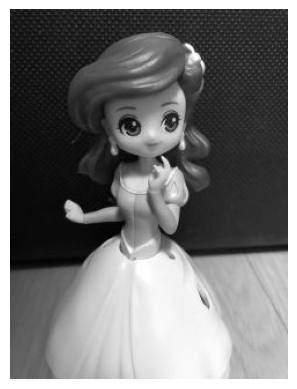

In [4]:
###############################################
# Input Image
###############################################

RGBImage = io.imread('./drive/MyDrive/Computer Vision class/img/TheLittleMermaid1.JPG')
GrayImage = color.rgb2gray(RGBImage)

print('Input Image')
plt.axis('off')
plt.imshow(GrayImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

# 1. Subsampling

1) We want to sample this sine wave

<img src='https://drive.google.com/uc?id=1QrN99m-EyXEG-q82B32lvAqWaMoMVU8b' height=100 width=500>

2) after sampling

<img src='https://drive.google.com/uc?id=1JNAdUIWMwrreMVNy6g3ut_SAZQbZHcbC' height=100 width=500>

3) **Undersampling** can cause information loss and we cannot distinguish if it is high-frequency or low-frequency, causing confusion
: **Aliasing problem**

<img src='https://drive.google.com/uc?id=157_v0d-O4KtEB_PrrNuOMNMOUIUrNfg5' height=100 width=500>

<img src='https://drive.google.com/uc?id=17BvT8v6GXSBCLC7gTDFJMQszTrePT8_M' height=100 width=500>

So it is hard to reconstruct the downsampled image into the original image
<br>*cf. Interpolation*</br>

## 1-1. Subsampling without filtering

Original Image


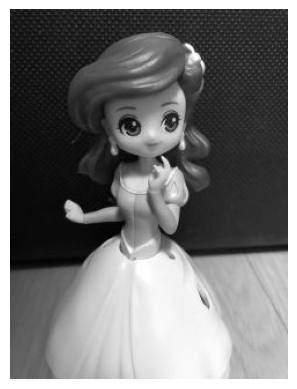

1/2 resolution = 2× subsample


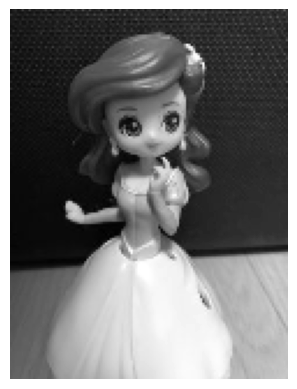

1/4 resolution = 4× subsample


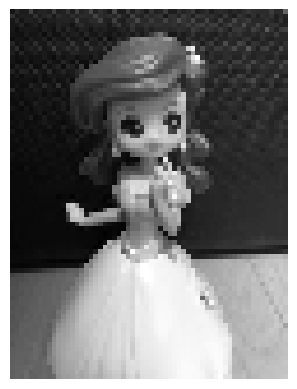

1/8 resolution = 8× subsample


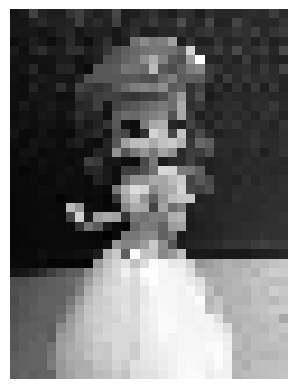

1/16 resolution = 16× subsample


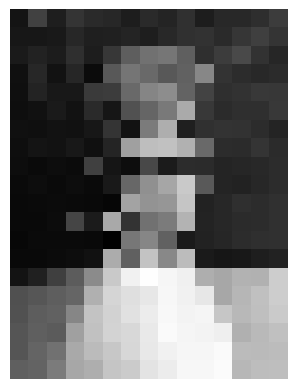

In [5]:
print('Original Image')
plt.axis('off')
plt.imshow(GrayImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

halfResolImage = GrayImage[::2,::2]
print('1/2 resolution = 2× subsample')
plt.axis('off')
plt.imshow(halfResolImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

halfHalfResolImage = halfResolImage[::2,::2]
print('1/4 resolution = 4× subsample')
plt.axis('off')
plt.imshow(halfHalfResolImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

moreHalfResolImage = halfHalfResolImage[::2,::2]
print('1/8 resolution = 8× subsample')
plt.axis('off')
plt.imshow(moreHalfResolImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

muchmoreHalfResolImage = moreHalfResolImage[::2,::2]
print('1/16 resolution = 16× subsample')
plt.axis('off')
plt.imshow(muchmoreHalfResolImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

Solution for **Aliasing problem**
- Sample more often: oversampling
- Anti-Aliasing: remove all frequencies that are greater than half the new sampling frequency (apply low-pass filter)

## 1-2. Subsampling with Gaussian pre-filtering
- can build **Gaussain Image Pyramid**

In [6]:
gaussian = (1/16)*np.array((
        [1,2,1],
        [2,4,2],
        [1,2,1]),
        dtype="float")

Original Image


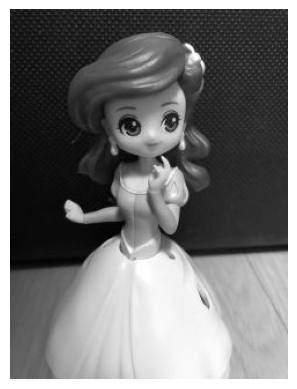

1/2 resolution = 2× subsample


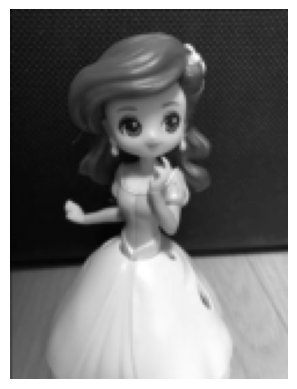

1/4 resolution = 4× subsample


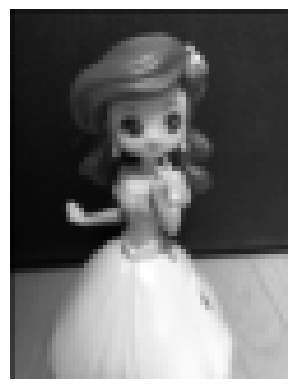

In [7]:
print('Original Image')
plt.axis('off')
plt.imshow(GrayImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

gaussianImage = convolve2d(GrayImage, gaussian, 'same')
halfResolImage = gaussianImage[::2,::2]
print('1/2 resolution = 2× subsample')
plt.axis('off')
plt.imshow(halfResolImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

halfGaussianImage = convolve2d(halfResolImage, gaussian, 'same')
halfHalfResolImage = halfGaussianImage[::2,::2]
print('1/4 resolution = 4× subsample')
plt.axis('off')
plt.imshow(halfHalfResolImage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

# 2. Hybrid Image

High Frequency Image


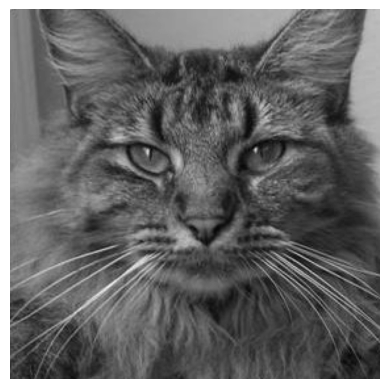

Low Frequency Image


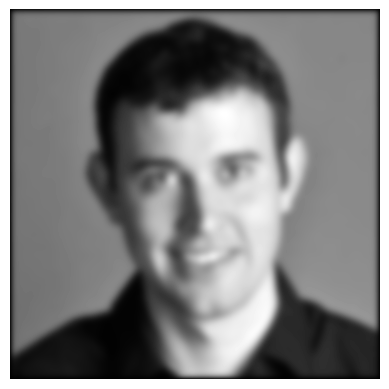

Hybrid Image with big size


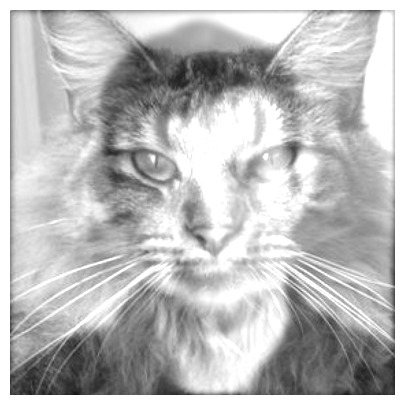

Hybrid Image with small size


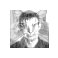

In [36]:
###############################################
# Cat Image (High Frequency Image)
###############################################

# Cat Image
RGBCat = io.imread('./drive/MyDrive/Computer Vision class/img/Cat.jpeg')
CatHighimage = color.rgb2gray(RGBCat)[:1000][:1000]

print("High Frequency Image")
plt.axis('off')
plt.imshow(CatHighimage, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()
###############################################
# Person Image with Low-pass Box Filter
###############################################

# Person Image
RGBPerson = io.imread('./drive/MyDrive/Computer Vision class/img/Person.jpeg')
GrayPerson = color.rgb2gray(RGBPerson)[:1000][:1000]

# Box Filter
box = (1/25) * np.array((
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1],
        [1,1,1,1,1]),
        dtype="float")

for i in range(50):
  GrayPerson = convolve2d(GrayPerson, box, 'same')

print("Low Frequency Image")
PersonLowimage = GrayPerson
plt.axis('off')
plt.imshow(PersonLowimage, cmap='gray')
plt.show()

###############################################
# Hybrid Image: add two images
###############################################

hybrid = CatHighimage + PersonLowimage

# Big Image
print("Hybrid Image with big size")
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(hybrid, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

# Small Image
print("Hybrid Image with small size")
plt.figure(figsize=(0.5,0.5))
plt.axis('off')
plt.imshow(hybrid, cmap='gray', vmin=0.0, vmax=1.0)
plt.show()

reference : https://velog.io/@claude_ssim/%EC%8B%9C%EA%B0%81%EC%A7%80%EB%8A%A5-Image-processing-basic-2